# 1. Imports

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from get_data import init_column_map, pull, pull_data_rowwise
import numpy as np

# 2. Descriptive Analytics

In [2]:
csv_file = './data/survey_pre_processed_data.csv'

In [3]:
init_column_map(csv_file)

In [4]:
# Frequency check for vehicle type:
q1_cols = ["Q1_1","Q1_2","Q1_3","Q1_4","Q1_99"]

for col in q1_cols:
    freq = pull(col, csv_file)  # returns a dictionary {answer_value: count}
    print(f"Frequency for {col} => {freq}")

# Other demographic variables
demo_cols = ["gender","colour_plus","region","Q21","Q22","AgeBand","Q24"]

for col in demo_cols:
    freq = pull(col, csv_file)
    print(f"Frequency for {col} => {freq}")

Frequency for Q1_1 => {'1': 874, '0': 484}
Frequency for Q1_2 => {'0': 590, '1': 768}
Frequency for Q1_3 => {'0': 1325, '1': 33}
Frequency for Q1_4 => {'0': 1247, '1': 111}
Frequency for Q1_99 => {'0': 1355, '1': 3}
Frequency for gender => {'Male': 859, 'Not Stated': 140, 'Female': 359}
Frequency for colour_plus => {'LILAC': 232, 'KHAKI': 275, 'PURPLE': 166, 'GREY': 353, 'ORANGE': 167, 'BROWN': 41, 'RED': 29, 'UNKNOWN': 8, 'YELLOW': 36, 'CYAN': 11, 'GREEN': 6}
Frequency for region => {'METROPOLITAN': 478, 'RURAL': 251, 'INTERSTATE': 221, 'REGIONAL': 403, 'UNKNOWN': 5}
Frequency for Q21 => {'Freestanding house': 1025, 'Townhouse': 71, 'Apartment/unit': 179, 'Semidetached or terrace': 62, 'Other (please specify)': 21}
Frequency for Q22 => {'Own outright': 919, 'Own with mortgage': 306, 'Other (please specify)': 31, 'Rent': 102}
Frequency for AgeBand => {'Prefer not to say': 36, '65+': 682, '55-64 years': 299, '45-54 years': 180, '35-44 years': 121, '25-34 years': 30, '18-24 years': 10}
F

In [5]:
# Let's pick a few columns to analyze together
columns_of_interest = q1_cols + demo_cols
rows_data = pull_data_rowwise(columns_of_interest, csv_file)

# Create a pandas DataFrame:
import pandas as pd

df = pd.DataFrame(rows_data, columns=columns_of_interest)

# Because Q1_x are '0' or '1' strings, let's convert them to numeric for easier ops
for c in q1_cols:
    df[c] = df[c].astype(int)  # convert '0'/'1' -> 0/1

print("Sample of the combined DataFrame:")
df

Sample of the combined DataFrame:


,Q1_1,Q1_2,Q1_3,Q1_4,Q1_99,gender,colour_plus,region,Q21,Q22,AgeBand,Q24
0,1,0,0,0,0,Male,LILAC,METROPOLITAN,Freestanding house,Own outright,Prefer not to say,Prefer not to say
1,1,1,0,0,0,Male,LILAC,RURAL,Freestanding house,Own outright,Prefer not to say,Prefer not to say
2,1,0,0,0,0,Not Stated,KHAKI,INTERSTATE,Townhouse,Own outright,65+,"$1000-2000 a week / $52,000-$104,000 a year"
3,0,0,0,1,0,Male,PURPLE,METROPOLITAN,Freestanding house,Own outright,55-64 years,Prefer not to say
4,1,1,0,1,0,Male,PURPLE,INTERSTATE,Freestanding house,Own with mortgage,45-54 years,Prefer not to say
...,...,...,...,...,...,...,...,...,...,...,...,...
1353,0,1,0,0,0,Female,KHAKI,REGIONAL,Townhouse,Own outright,55-64 years,Prefer not to say
1354,1,0,0,0,0,Male,LILAC,REGIONAL,Apartment/unit,Own outright,65+,"$1000-2000 a week / $52,000-$104,000 a year"
1355,1,1,0,0,0,Male,GREY,REGIONAL,Freestanding house,Own outright,65+,"$2000-3000 a week / $104,000-$156,000 a year"
1356,0,1,0,0,0,Male,LILAC,RURAL,Other (please specify),Other (please specify),65+,"Less than $500 a week / Less than $26,000 a year"


## 2.1. Demographics:

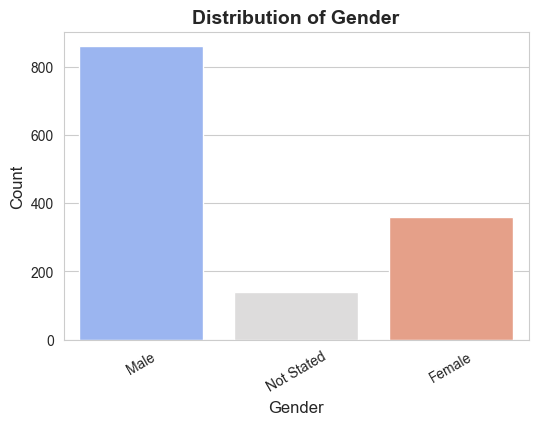

In [6]:
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")  # Add a background grid
sns.countplot(x="gender", data=df, palette="coolwarm")  # Use a color palette
plt.title("Distribution of Gender", fontsize=14, fontweight="bold")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=30)  # Rotate labels for better readability
plt.show()


<Figure size 800x500 with 0 Axes>

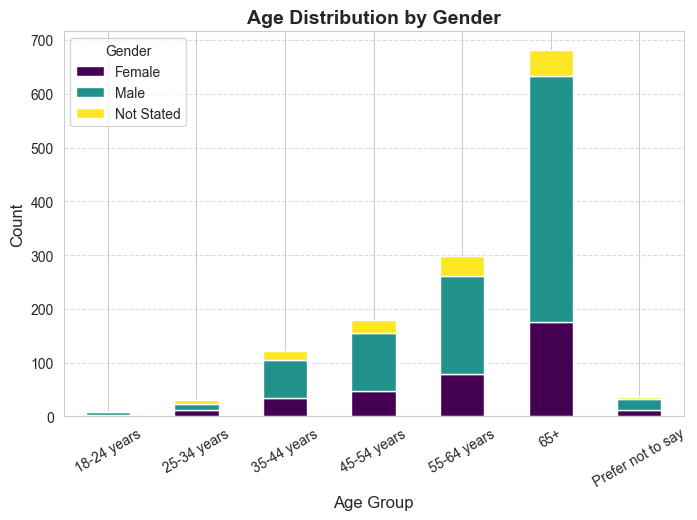

In [7]:
plt.figure(figsize=(8, 5))
age_gender = df.groupby(["AgeBand", "gender"]).size().unstack()
age_gender.plot(kind="bar", stacked=True, colormap="viridis", figsize=(8, 5))

plt.title("Age Distribution by Gender", fontsize=14, fontweight="bold")
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Gender")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

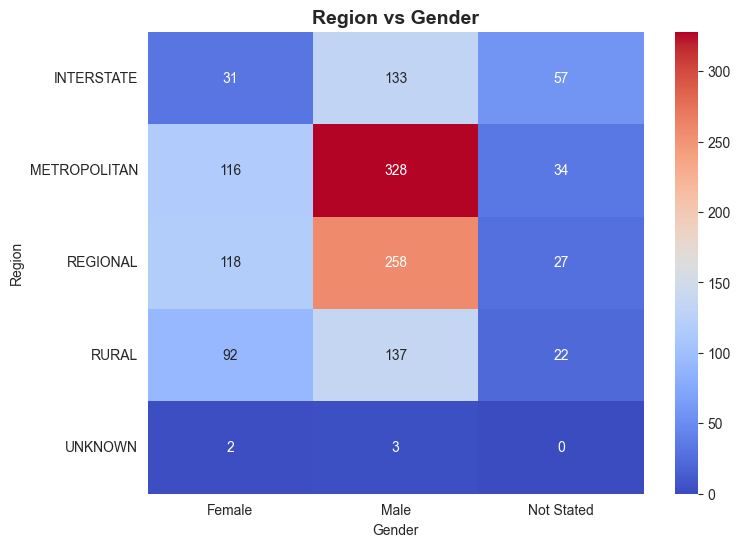

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df["region"], df["gender"]), annot=True, cmap="coolwarm", fmt="d")
plt.title("Region vs Gender", fontsize=14, fontweight="bold")
plt.ylabel("Region")
plt.xlabel("Gender")
plt.show()


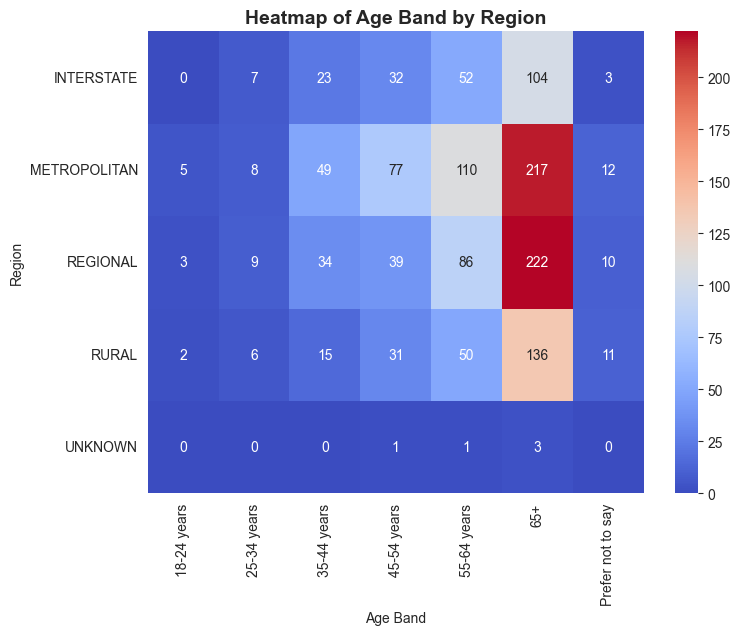

In [9]:
plt.figure(figsize=(8, 6))
heatmap_data = pd.crosstab(df["region"], df["AgeBand"])
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt="d")
plt.title("Heatmap of Age Band by Region", fontsize=14, fontweight="bold")
plt.ylabel("Region")
plt.xlabel("Age Band")
plt.show()


In [10]:
heatmap_data.sum()

AgeBand
18-24 years           10
25-34 years           30
35-44 years          121
45-54 years          180
55-64 years          299
65+                  682
Prefer not to say     36
dtype: int64

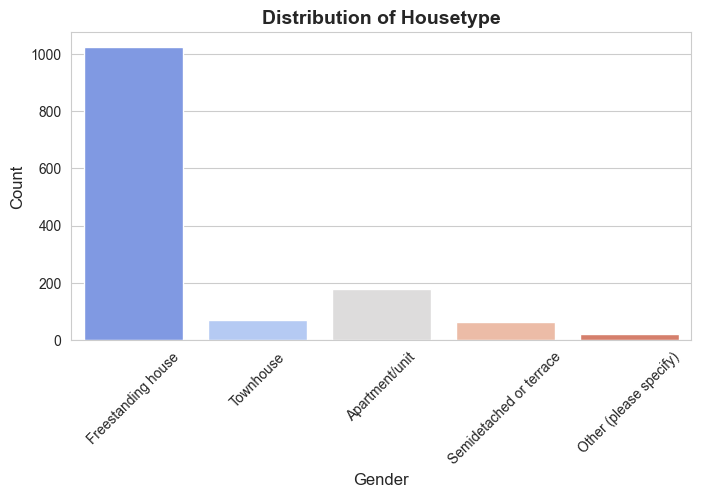

In [11]:
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")  # Add a background grid
sns.countplot(x="Q21", data=df, palette="coolwarm")  # Use a color palette
plt.title("Distribution of Housetype", fontsize=14, fontweight="bold")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


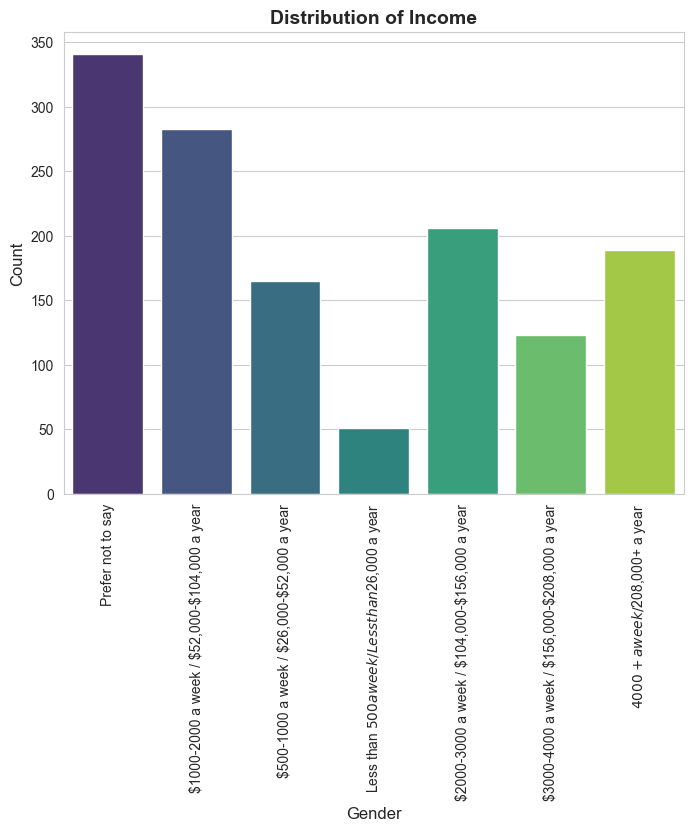

In [12]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")  # Add a background grid
sns.countplot(x="Q24", data=df, palette="viridis")  # Use a color palette
plt.title("Distribution of Income", fontsize=14, fontweight="bold")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()


### Scratch

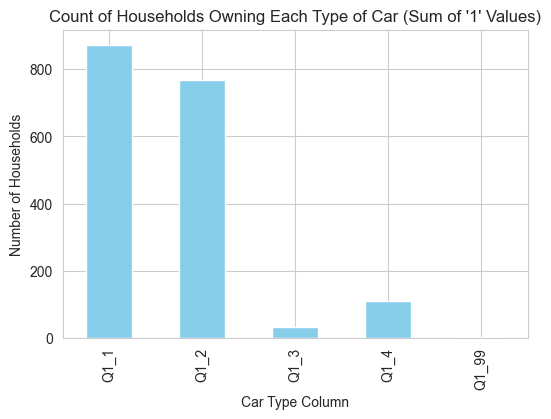

In [13]:
car_ownership_sums = df[q1_cols].sum()
car_ownership_sums.plot(kind='bar', figsize=(6,4), color='skyblue')
plt.title("Count of Households Owning Each Type of Car (Sum of '1' Values)")
plt.xlabel("Car Type Column")
plt.ylabel("Number of Households")
plt.show()

In [ ]:
car_ownership_sums
# There are 1789 cars

Q1_1     874
Q1_2     768
Q1_3      33
Q1_4     111
Q1_99      3
dtype: int64

## 2.2. Cross Tab

Crosstab of Income vs. Owns EV (Q1_2):
Q1_2                                                0    1
Q24                                                       
$1000-2000 a week / $52,000-$104,000 a year       130  153
$2000-3000 a week / $104,000-$156,000 a year       74  132
$3000-4000 a week / $156,000-$208,000 a year       37   86
$4000+ a week / $208,000+ a year                   44  145
$500-1000 a week / $26,000-$52,000 a year         101   64
Less than $500 a week / Less than $26,000 a year   33   18
Prefer not to say                                 171  170


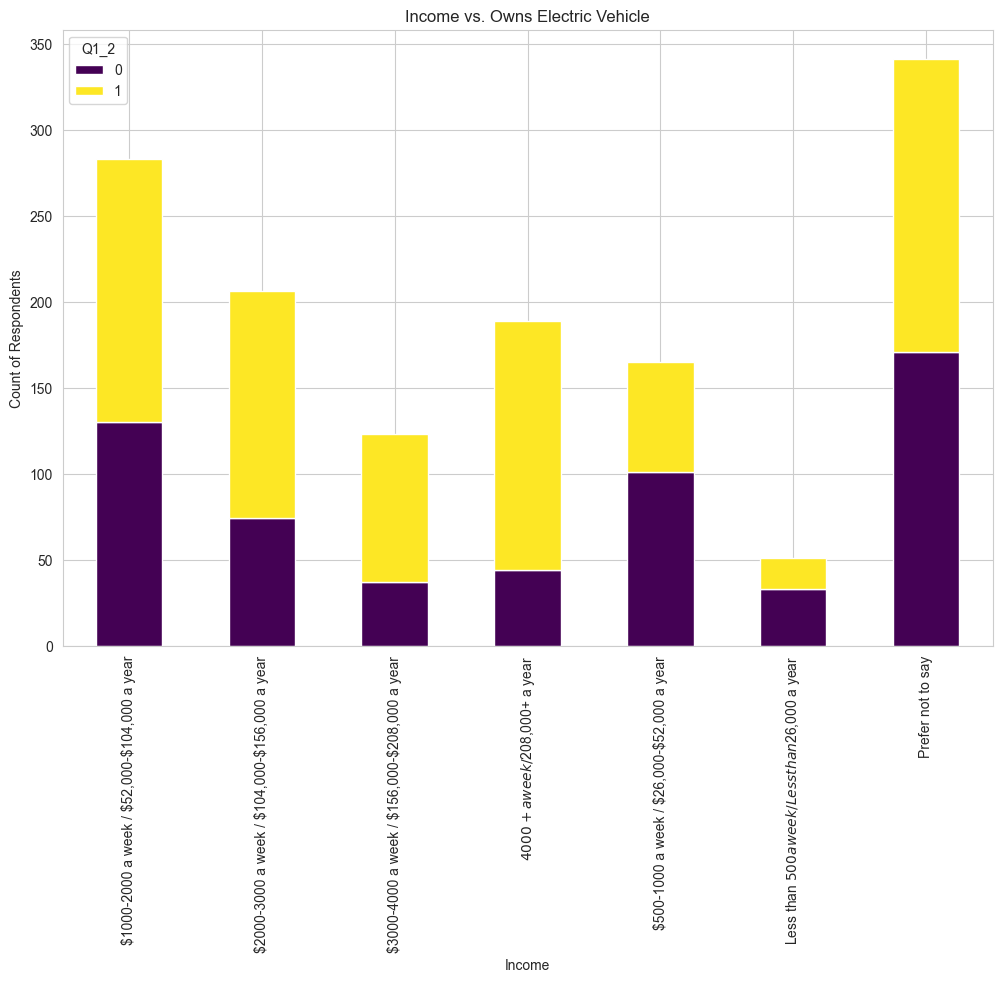

In [16]:
ct = pd.crosstab(df["Q24"], df["Q1_2"])
print("Crosstab of Income vs. Owns EV (Q1_2):")
print(ct)

# We can visualize as a bar chart
ct.plot(kind='bar', stacked=True, figsize=(12,8), colormap='viridis')
plt.title("Income vs. Owns Electric Vehicle")
plt.xlabel("Income")
plt.ylabel("Count of Respondents")
plt.show()

## 2.3. Charging Habits / Time of vehicle at home

In [80]:
##########################################
# Define Q6 (weekdays) columns by vehicle + time
##########################################
# "Q6ax1" => weekdays, x1 => petrol/diesel
# "Q6ax2" => weekdays, x2 => electric
# "Q6ax3" => weekdays, x3 => plug-in hybrid
# "Q6ax4" => weekdays, x4 => hybrid

# Each has 3 time periods: 
# _1 => 10am-3pm, 
# _2 => 4pm-9pm, 
# _3 => 9pm-6am

q6a_petrol = ["Q6ax1_1","Q6ax1_2","Q6ax1_3"]       # weekdays, petrol/diesel
q6a_ev     = ["Q6ax2_1","Q6ax2_2","Q6ax2_3"]       # weekdays, EV
q6a_plughyb= ["Q6ax3_1","Q6ax3_2","Q6ax3_3"]       # weekdays, plug-in hybrid
q6a_hybrid = ["Q6ax4_1","Q6ax4_2","Q6ax4_3"]       # weekdays, hybrid

# Combine them all for weekdays
q6a_cols = q6a_petrol + q6a_ev + q6a_plughyb + q6a_hybrid

In [81]:
##########################################
# Pull the data from CSV
##########################################
init_column_map(csv_file)

# We'll get both Q6a columns and the demographic columns
columns_of_interest = q6a_cols + demo_cols
rows = pull_data_rowwise(columns_of_interest, csv_file)

# Make a DataFrame
df = pd.DataFrame(rows, columns=columns_of_interest)

df

,Q6ax1_1,Q6ax1_2,Q6ax1_3,Q6ax2_1,Q6ax2_2,Q6ax2_3,Q6ax3_1,Q6ax3_2,Q6ax3_3,Q6ax4_1,Q6ax4_2,Q6ax4_3,gender,colour_plus,region,Q21,Q22,AgeBand,Q24
0,3,5,5,,,,,,,,,,Male,LILAC,METROPOLITAN,Freestanding house,Own outright,Prefer not to say,Prefer not to say
1,5,5,5,5,5,5,,,,,,,Male,LILAC,RURAL,Freestanding house,Own outright,Prefer not to say,Prefer not to say
2,2,1,2,,,,,,,,,,Not Stated,KHAKI,INTERSTATE,Townhouse,Own outright,65+,"$1000-2000 a week / $52,000-$104,000 a year"
3,,,,,,,,,,0 - Weekdays,5,5,Male,PURPLE,METROPOLITAN,Freestanding house,Own outright,55-64 years,Prefer not to say
4,5,5,5,4,4,4,,,,2,2,5,Male,PURPLE,INTERSTATE,Freestanding house,Own with mortgage,45-54 years,Prefer not to say
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,,,,1,3,5,,,,,,,Female,KHAKI,REGIONAL,Townhouse,Own outright,55-64 years,Prefer not to say
1354,5,5,5,,,,,,,,,,Male,LILAC,REGIONAL,Apartment/unit,Own outright,65+,"$1000-2000 a week / $52,000-$104,000 a year"
1355,4,4,5,4,4,5,,,,,,,Male,GREY,REGIONAL,Freestanding house,Own outright,65+,"$2000-3000 a week / $104,000-$156,000 a year"
1356,,,,3,5,5,,,,,,,Male,LILAC,RURAL,Other (please specify),Other (please specify),65+,"Less than $500 a week / Less than $26,000 a year"


In [82]:
# Ensure "0 - Weekdays" is converted correctly
for col in q6a_cols:
    df[col] = df[col].replace("0 - Weekdays", 0)  # Convert "0 - Weekdays" to 0
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert all values to numbers

# Debugging: Check unique values in each column
for col in q6a_cols:
    print(f"Unique values in {col}: {df[col].dropna().unique()}")

Unique values in Q6ax1_1: [3. 5. 2. 4. 0. 1.]
Unique values in Q6ax1_2: [5. 1. 3. 2. 4. 0.]
Unique values in Q6ax1_3: [5. 2. 0. 4. 3. 1.]
Unique values in Q6ax2_1: [5. 4. 3. 1. 2. 0.]
Unique values in Q6ax2_2: [5. 4. 3. 2. 0. 1.]
Unique values in Q6ax2_3: [5. 4. 3. 1. 0. 2.]
Unique values in Q6ax3_1: [3. 1. 4. 0. 2. 5.]
Unique values in Q6ax3_2: [5. 4. 2. 3. 1.]
Unique values in Q6ax3_3: [5. 2. 3. 4.]
Unique values in Q6ax4_1: [0. 2. 5. 4. 3. 1.]
Unique values in Q6ax4_2: [5. 2. 3. 0. 4. 1.]
Unique values in Q6ax4_3: [5. 3. 0. 1. 4. 2.]


In [83]:
# Count missing (assumed zero) responses for each charging question
missing_counts = (df[q6a_cols] == 0).sum()

# Display summary of non-responses per column
print("Number of respondents who did NOT charge (recorded as 0):")
print(missing_counts)


Number of respondents who did NOT charge (recorded as 0):
Q6ax1_1    118
Q6ax1_2     28
Q6ax1_3     31
Q6ax2_1    102
Q6ax2_2     24
Q6ax2_3     14
Q6ax3_1      4
Q6ax3_2      0
Q6ax3_3      0
Q6ax4_1     12
Q6ax4_2      6
Q6ax4_3      9
dtype: int64


In [84]:
print(df[q6a_petrol + q6a_ev + q6a_plughyb + q6a_hybrid].notna().sum())

Q6ax1_1    874
Q6ax1_2    874
Q6ax1_3    874
Q6ax2_1    768
Q6ax2_2    768
Q6ax2_3    768
Q6ax3_1     33
Q6ax3_2     33
Q6ax3_3     33
Q6ax4_1    111
Q6ax4_2    111
Q6ax4_3    111
dtype: int64


In [85]:
# Prepare data for heatmap
counts_dict = {vehicle: [] for vehicle in ["Petrol/Diesel", "EV", "Plug-in Hybrid", "Hybrid"]}
time_periods = ["10AM-3PM", "4PM-9PM", "9PM-6AM"]
vehicle_types = ["Petrol/Diesel", "EV", "Plug-in Hybrid", "Hybrid"]

In [86]:
# Iterate over each time period and vehicle type
for time_idx in range(3):  # Three time periods
    for vehicle_idx, vehicle_label in enumerate(vehicle_types):
        vehicle_columns = [q6a_petrol, q6a_ev, q6a_plughyb, q6a_hybrid][vehicle_idx]
        counts = df[vehicle_columns[time_idx]].dropna().astype(int).value_counts().reindex(range(6), fill_value=0).values
        counts_dict[vehicle_label].append(counts)

# Convert to numpy array and reshape correctly
heatmap_data = np.array([counts_dict[v] for v in vehicle_types])  # Ensures order matches vehicle_types

# Debugging: Compare values with Excel
print("Heatmap Data:\n", heatmap_data)

Heatmap Data:
 [[[118  61 120 181 132 262]
  [ 28  25  59 109 148 505]
  [ 31  10  15  28  56 734]]

 [[102  78 133 179 112 164]
  [ 24  15  68 124 169 368]
  [ 14  11  13  19  50 661]]

 [[  4   6   6   8   4   5]
  [  0   1   2   4   6  20]
  [  0   0   2   1   4  26]]

 [[ 12   6  28  30  10  25]
  [  6   8  10  22  13  52]
  [  9   3   2   6   5  86]]]


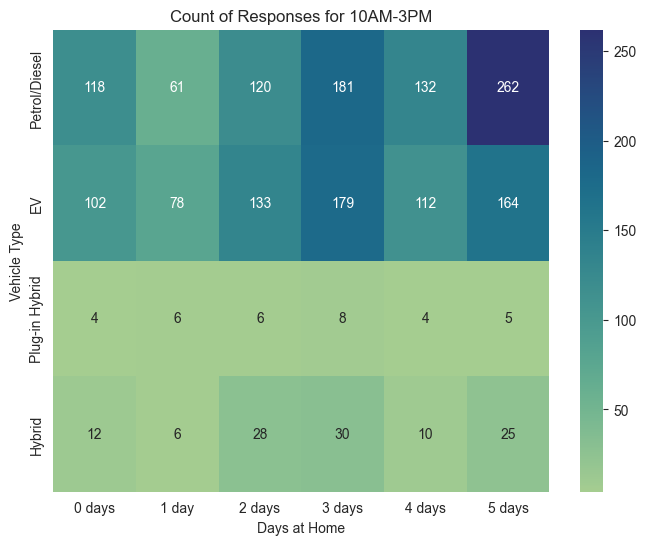

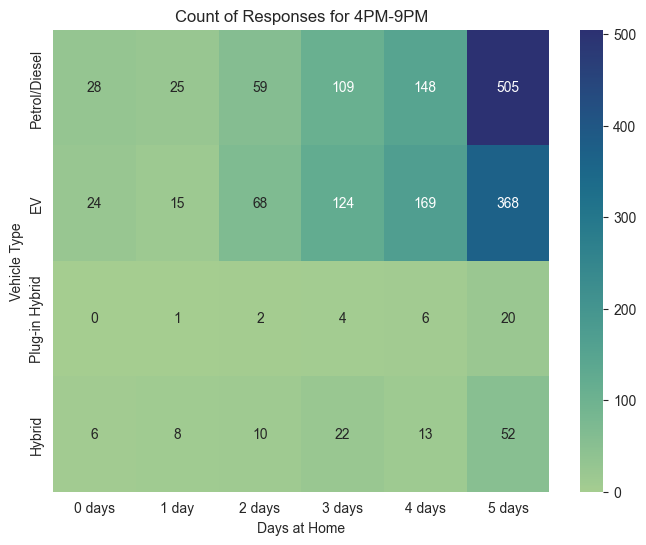

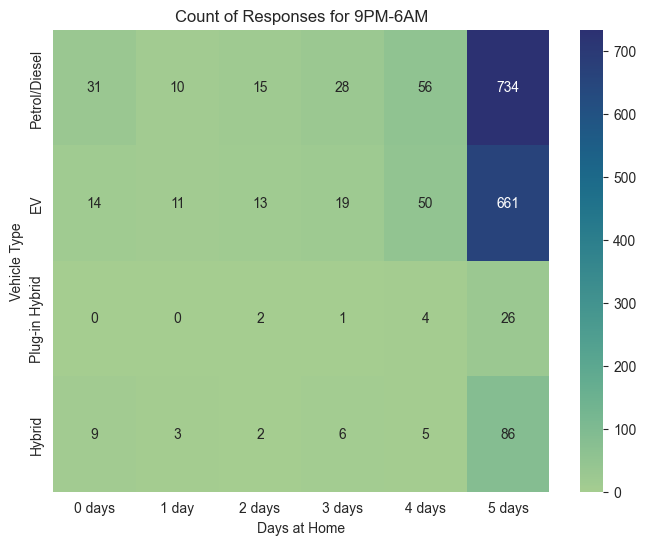

In [87]:

# Plot heatmap for each time period
for i, time_period in enumerate(time_periods):
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data[:, i, :], annot=True, cmap="crest", fmt="d", 
                xticklabels=["0 days", "1 day", "2 days", "3 days", "4 days", "5 days"], 
                yticklabels=vehicle_types)

    plt.title(f"Count of Responses for {time_period}")
    plt.xlabel("Days at Home")
    plt.ylabel("Vehicle Type")
    plt.show()

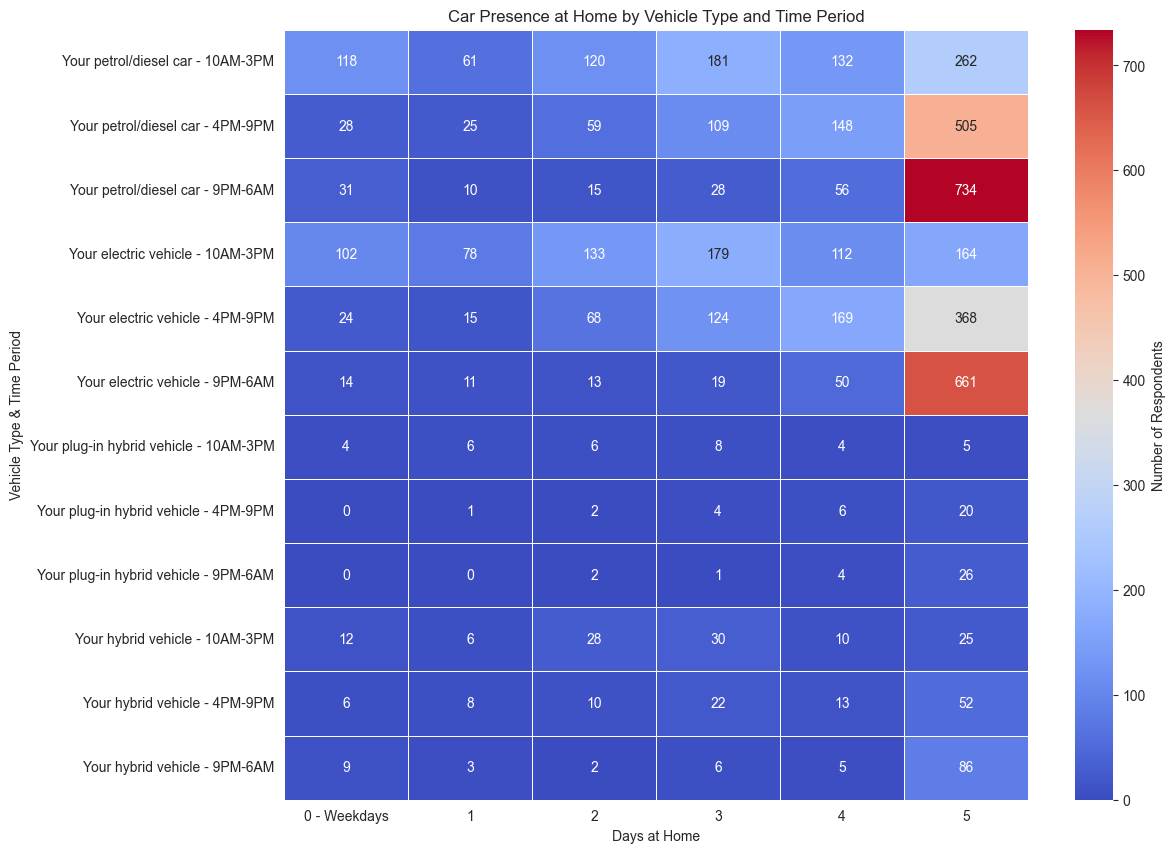

In [103]:
# Define time periods and vehicle types
time_periods = ["10AM-3PM", "4PM-9PM", "9PM-6AM"]
vehicle_types = ["Your petrol/diesel car", "Your electric vehicle", "Your plug-in hybrid vehicle", "Your hybrid vehicle"]
day_counts = range(6)  # 0 to 5 days

# Prepare heatmap data storage
heatmap_data = []
row_labels = []

# Iterate over each vehicle type and time period
for vehicle_idx, vehicle_label in enumerate(vehicle_types):
    for time_idx, time_label in enumerate(time_periods):
        vehicle_columns = [q6a_petrol, q6a_ev, q6a_plughyb, q6a_hybrid][vehicle_idx]

        # Drop NaNs before counting
        counts = df[vehicle_columns[time_idx]].dropna().astype(int).value_counts().reindex(day_counts, fill_value=0).values

        # Store heatmap data
        heatmap_data.append(counts)
        row_labels.append(f"{vehicle_label} - {time_label}")  # Proper row label for heatmap

# Convert heatmap data into a DataFrame
heatmap_df = pd.DataFrame(heatmap_data, index=row_labels, columns=["0 - Weekdays", "1", "2", "3", "4", "5"])

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_df, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5, cbar_kws={"label": "Number of Respondents"})

plt.title("Car Presence at Home by Vehicle Type and Time Period")
plt.xlabel("Days at Home")
plt.ylabel("Vehicle Type & Time Period")
plt.xticks(rotation=0)  # Keep labels readable
plt.yticks(rotation=0)

plt.show()

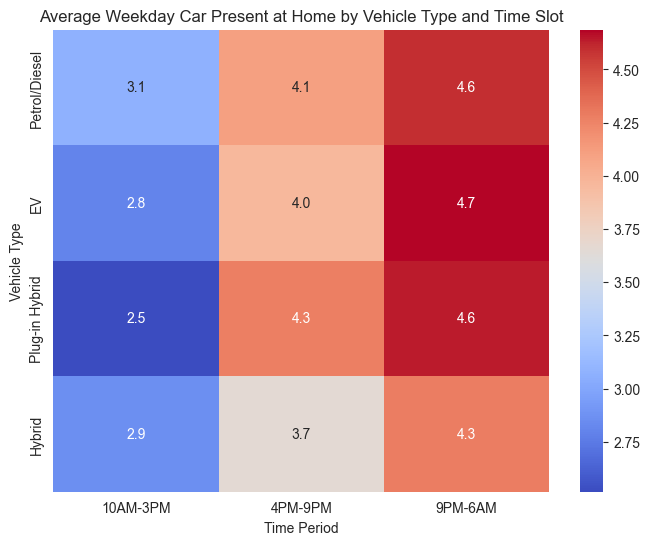

In [105]:
plt.figure(figsize=(8, 6))

# Calculate mean responses (average days home)
heatmap_data = df[q6a_cols].apply(pd.to_numeric, errors='coerce').mean().values.reshape(4,3)

sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".1f", 
            xticklabels=["10AM-3PM", "4PM-9PM", "9PM-6AM"], 
            yticklabels=["Petrol/Diesel", "EV", "Plug-in Hybrid", "Hybrid"])

plt.title("Average Weekday Car Present at Home by Vehicle Type and Time Slot")
plt.xlabel("Time Period")
plt.ylabel("Vehicle Type")
plt.show()
